In [1]:
#Importo as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados dos combustíveis automotivos do 1º semestre de 2025
#https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp
#1o. Sem 2025 - Combustíveis Automotivos
dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")
dfBD.head(2)

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_22196\3989438415.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,"6,29",NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,"6,49",NaN,R$ / litro,RAIZEN


In [3]:
#Tenho que transformar a coluna "Valor de Venda" em FLOAT, pois ela está como STRING (porque está com vírgula no lugar de ponto)
dfBD['Valor de Venda'] = dfBD['Valor de Venda'].str.replace(',','.').astype(float)
dfBD.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,6.29,NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,6.49,NaN,R$ / litro,RAIZEN


In [4]:
#Seleciono somente os dados de GASOLINA da Capital do RJ (Estado = RJ e Municipio = Rio de Janeiro)
dfGasolinaCapitalRJ = dfBD.loc[(dfBD["Estado - Sigla"] == "RJ") & (dfBD["Municipio"] == 'RIO DE JANEIRO') & (dfBD["Produto"] == "GASOLINA")]
dfGasolinaCapitalRJ.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
998,SE,RJ,RIO DE JANEIRO,POSTO MANÉ GARRINCHA DE BOTAFOGO LTDA.,07.877.289/0001-70,RUA VOLUNTARIOS DA PATRIA,308,NaN,BOTAFOGO,22270-010,GASOLINA,02/01/2025,5.99,NaN,R$ / litro,RAIZEN
1001,SE,RJ,RIO DE JANEIRO,POSTO DE GASOLINA GASOAL LTDA,05.159.154/0001-44,RUA VINTE E QUATRO DE MAIO,871,NaN,ENGENHO NOVO,20950-091,GASOLINA,02/01/2025,5.59,NaN,R$ / litro,BRANCA


In [5]:
#Calculo a média do valor de venda por bairro
dfValorVendaPorBairro = dfGasolinaCapitalRJ.groupby("Bairro")["Valor de Venda"].mean().reset_index()
dfValorVendaPorBairro

,Bairro,Valor de Venda
0,ANCHIETA,5.972857
1,BANGU,5.998333
2,BARRA DA TIJUCA,6.272708
3,BENFICA,6.334231
4,BONSUCESSO,6.111905
5,BOTAFOGO,6.242308
6,BRAZ DE PINA,5.685000
7,CAJU,6.094348
8,CAMPO GRANDE,5.979210
9,CATUMBI,5.813043


In [6]:
#Monto o array com os valores de venda
arrayValorVendaPorBairro = np.array(dfValorVendaPorBairro["Valor de Venda"])
arrayValorVendaPorBairro

array([5.97285714, 5.99833333, 6.27270777, 6.33423077, 6.11190476,
       6.24230769, 5.685     , 6.09434783, 5.97920973, 5.81304348,
       6.1525    , 5.765     , 6.25341463, 6.06859155, 5.71307692,
       5.89      , 6.674     , 6.19      , 6.87      , 5.86777778,
       6.29      , 6.22333333, 6.19      , 5.99      , 6.09      ,
       6.41      , 6.17      , 6.0562381 , 6.24058824, 6.29      ,
       6.6847619 , 6.24      , 6.51666667, 6.38208333, 6.32238095,
       5.7372    , 5.99      , 5.79      , 6.55428571, 5.92183673,
       5.996     , 6.1775    , 5.6726087 , 5.87518519, 6.3275    ,
       6.12444444, 5.73625   , 5.64      , 6.11647619, 6.19      ,
       5.90621622, 5.90769231, 6.0388    , 6.12787879, 6.5025    ,
       6.26391304, 5.86777778, 6.07571429])

In [7]:
#Cálculos estatísticos
media = np.mean(arrayValorVendaPorBairro)
mediana = np.median(arrayValorVendaPorBairro)
q1 = np.percentile(arrayValorVendaPorBairro, 25)
q2 = np.percentile(arrayValorVendaPorBairro, 50)
q3 = np.percentile(arrayValorVendaPorBairro, 75)
distancia = (media - mediana) / mediana
iqr = q3 - q1
limSuperior = q3 + (1.5 * iqr)
limInferior = q1 - (1.5 * iqr)

print(f'Média     = {media:.2f}')
print(f'Mediana   = {mediana:.2f}')
print(f'Q1        = {q1:.2f}')
print(f'Q2        = {q2:.2f}')
print(f'Q3        = {q3:.2f}')
print(f'Distância = {distancia * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limSuperior:.2f}')
print(f'Lim. Inf. = {limInferior:.2f}')

Média     = 6.11
Mediana   = 6.11
Q1        = 5.91
Q2        = 6.11
Q3        = 6.26
Distância = -0.01 %
Lim. Sup. = 6.79
Lim. Inf. = 5.39


In [8]:
#OUTLIERs acima do limite superior
bairrosOutliersLimSuperior = dfValorVendaPorBairro.loc[dfValorVendaPorBairro["Valor de Venda"] >= limSuperior]
bairrosOutliersLimSuperior.head(2)

,Bairro,Valor de Venda
18,FLAMENGO,6.87


In [11]:
# Identifique quais bairros apresentam valores de venda significativamente diferentes da maioria.
# Para isso, analise a distribuição dos preços e determine quais bairros merecem atenção especial por
# estarem fora do padrão observado.
#
# RESPOSTA: O bairro Flamengo merece uma atenção especial por apresentar um valor médio do valor de venda acima do limite superior.


# Ao final, discuta qual medida de tendência central (média ou mediana) representa melhor o comportamento
# dos preços nessa análise e justifique sua escolha com base na distância entre média e mediana.
#
# RESPOSTA: A média representa melhor o comportamento dos valores de venda, pois a distância é de apenas -0,01%.
#           Essa informação nos afirma que a média é pouco influenciada por valores OUTLIERS.

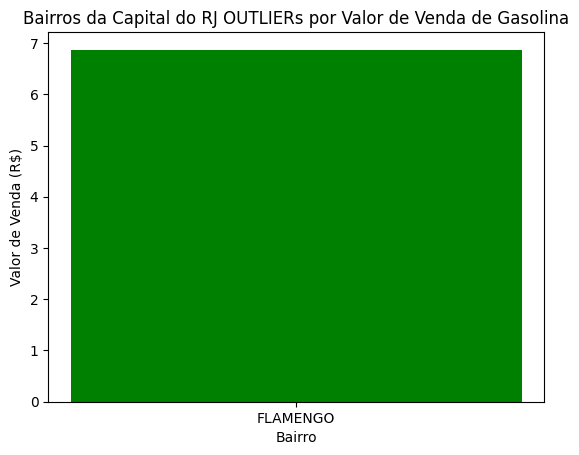

In [36]:
#Gero o gráfico
plt.bar(bairrosOutliersLimSuperior['Bairro'], bairrosOutliersLimSuperior['Valor de Venda'], color='green')
plt.title('Bairros da Capital do RJ OUTLIERs por Valor de Venda de Gasolina')
plt.xlabel('Bairro')
plt.ylabel('Valor de Venda (R$)')
plt.grid(False)
plt.show()